# Principles of Riemanian Geometry in Neural Networks

## Introduction

This notebook configures and executes experiments inspired by the Paper [Principles of Riemanian Geometry in Neural Networks](https://papers.nips.cc/paper/6873-principles-of-riemannian-geometry-in-neural-networks). Implementation is in 'net.py'.

In [7]:
import net
import torch.optim as optim
import numpy as np
import torch

## Quick config
You can configure different aspects of the numerical experiments including the network architecture used, the data geometry, training-related configurations (e.g. hyper-parameters), and plotting-related settings.

### Architecture

In [8]:
num_layers = 10
# Identity connection between layer input and layer output
identity = True
# Use c2-connections
c2 = False

### Data

In [9]:
N = 1000
data_manifold = 'spiral'
# Noise in location around data manifold
noise = 0.2
spiral_length_rad = 2*np.pi

### Training

In [10]:
learning_rate = 0.005
num_epochs = 200
# Weight decay
wd = 0.05
# Use adam-optimizer? Use SGD otherwise.
adam = True
# Gain for Xavier-Initialisation
init_gain = 0.001
torch.manual_seed(0)
np.random.seed(0)

### Plot

In [11]:
# Number of grid points per axis
grid_dim = 30
activation = torch.tanh
plot_points = True
plot_grids = False
# Only possible if plot_grids = True (for now)
plot_tensors = False
# Plot linear classifier in last Layer
plot_classifier = True
plot_rows = 1
plot_cols = 11
save_img = 'test'

## Experiments

epoch = 20, batch loss = 0.5039979219436646, accuracy = 0.75
epoch = 40, batch loss = 0.46164247393608093, accuracy = 0.768
epoch = 60, batch loss = 0.38826310634613037, accuracy = 0.798
epoch = 80, batch loss = 0.3189198076725006, accuracy = 0.805
epoch = 100, batch loss = 0.2549295723438263, accuracy = 0.866
epoch = 120, batch loss = 0.191465362906456, accuracy = 0.967
epoch = 140, batch loss = 0.1444888859987259, accuracy = 0.988
epoch = 160, batch loss = 0.11066753417253494, accuracy = 0.997
epoch = 180, batch loss = 0.0905526652932167, accuracy = 0.999
Plotting points for Layer 1
Plotting points for Layer 2
Plotting points for Layer 3
Plotting points for Layer 4
Plotting points for Layer 5
Plotting points for Layer 6
Plotting points for Layer 7
Plotting points for Layer 8
Plotting points for Layer 9
Plotting points for Layer 10


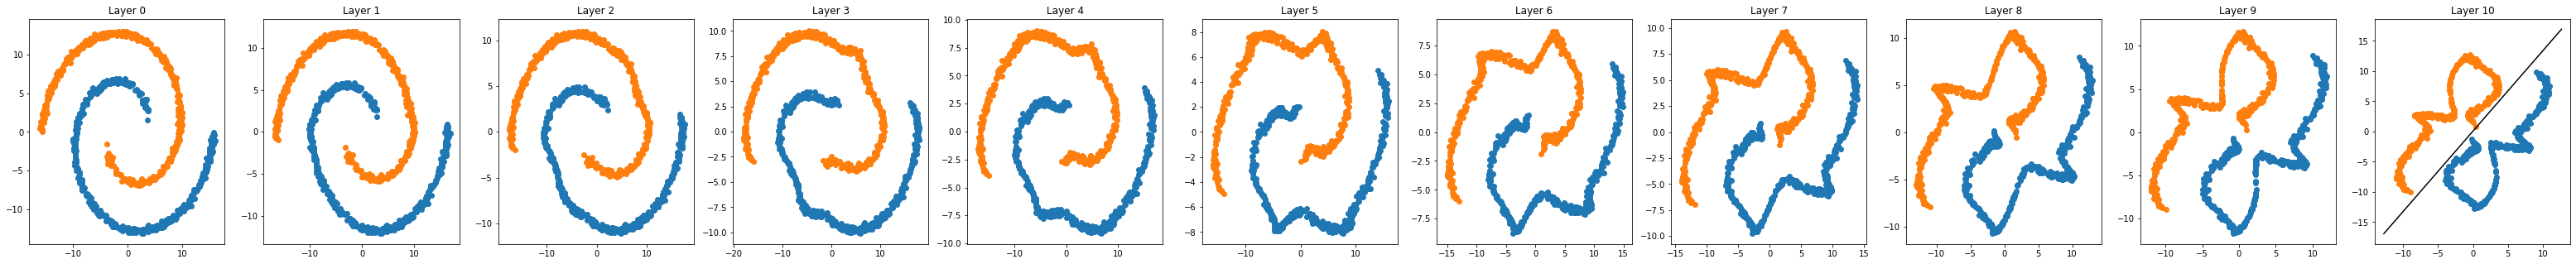

In [12]:
nn = net.Net(num_layers, identity, c2, init_gain, activation)

nn.init_weights()

if adam:
    optimizer = optim.AdamW(nn.parameters(), lr=learning_rate, weight_decay=wd)
else:
    optimizer = optim.SGD(nn.parameters(), lr=learning_rate, weight_decay=wd)

loss_func = net.CustomLoss()

if data_manifold == 'spiral':
    dat, x_a, x_b = net.spiral2d(N, noise, spiral_length_rad)
    input_data = torch.from_numpy(dat[:, :2]).float()
    target = torch.from_numpy(dat[:, 2]).float().view([N, 1])
else:
    x, y = net.data(N, noise, data_manifold)
    x_predict, _ = net.data(n_samples=N, n_noise=noise, n_shuffle=False)
    x_a, x_b = x_predict[:int(N/2)], x_predict[int(N/2):]
    input_data = torch.from_numpy(x).float()
    target = torch.from_numpy(y).float().view([N, 1])
for epoch in range(1, num_epochs):
    optimizer.zero_grad()
    output = nn(input_data)
    loss = loss_func(output, target)
    loss.backward()
    optimizer.step()
    if epoch % (num_epochs / 10) == 0:
        with torch.no_grad():
            acc = net.accuracy(output, target)
        print(f"epoch = {epoch}", end=", ")
        print(f"batch loss = {loss.item()}", end=", ")
        print(f"accuracy = {acc}")

nn.plot_geometry(x_a, x_b, grid_dim, grid_dim, plot_rows, plot_cols, 
                 plot_grids, plot_points, plot_tensors, plot_classifier, save_img)